__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

In [24]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

In [25]:
epi_df = pd.read_csv('epi_r.csv')

epi_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
epi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [27]:
epi_df.describe()

#except for calories, protein, fat, and sodium, other variables are binary. 

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#check target variable 

print(epi_df['rating'].describe())
print('\n')
print(epi_df['rating'].value_counts())

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64


4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64


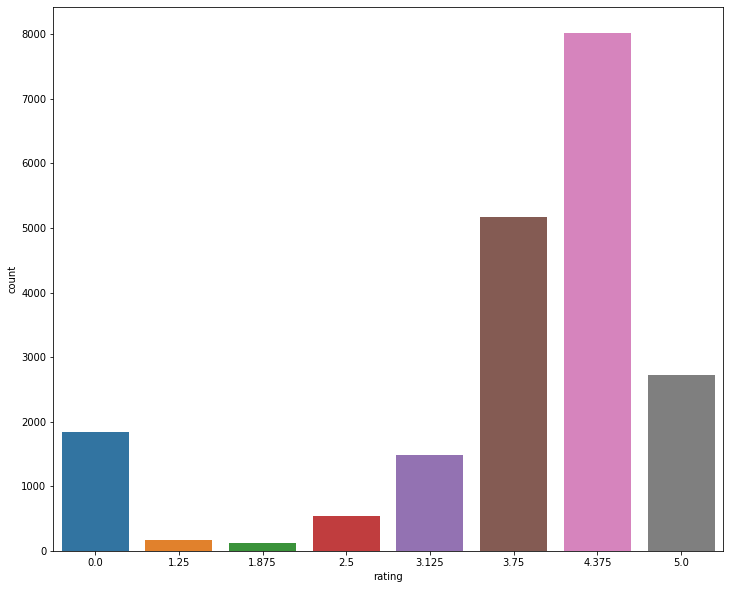

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(x='rating', data=epi_df)

plt.show()

In [29]:
#make target variable binary 
#think about balance

low = epi_df[epi_df['rating'] < 4]
high = epi_df[epi_df['rating'] >= 4]

low['rating_b'] = 0
high['rating_b'] = 1

epi = pd.concat([low,high], axis=0)

epi.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating_b
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
#check missing data 

total_missing = epi.isnull().sum().sort_values(ascending=False)
percent_missing = (epi.isnull().sum()/epi.isnull().count()*100).sort_values(ascending=False)

percent_missing

#create a model to predict fat, protein, sodium, and calories each time

fat                   20.860762
protein               20.756034
sodium                20.541592
calories              20.531618
rating_b               0.000000
fourth of july         0.000000
fritter                0.000000
frittata               0.000000
friendsgiving          0.000000
freezer food           0.000000
freeze/chill           0.000000
frankenrecipe          0.000000
frangelico             0.000000
france                 0.000000
fontina                0.000000
fortified wine         0.000000
food processor         0.000000
fruit                  0.000000
florida                0.000000
flat bread             0.000000
flaming hot summer     0.000000
fish                   0.000000
fig                    0.000000
feta                   0.000000
frozen dessert         0.000000
fry                    0.000000
fruit juice            0.000000
father's day           0.000000
grappa                 0.000000
grapefruit             0.000000
                        ...    
orzo    

In [41]:
#replace missing value by column mean 

missing = ['calories', 'protein', 'fat', 'sodium']

for var in missing:

    epi[var].fillna(epi[var].mean(), inplace=True)
    
epi.isnull().sum()

title                    0
rating                   0
calories                 0
protein                  0
fat                      0
sodium                   0
#cakeweek                0
#wasteless               0
22-minute meals          0
3-ingredient recipes     0
30 days of groceries     0
advance prep required    0
alabama                  0
alaska                   0
alcoholic                0
almond                   0
amaretto                 0
anchovy                  0
anise                    0
anniversary              0
anthony bourdain         0
aperitif                 0
appetizer                0
apple                    0
apple juice              0
apricot                  0
arizona                  0
artichoke                0
arugula                  0
asian pear               0
                        ..
wasabi                   0
washington               0
washington, d.c.         0
watercress               0
watermelon               0
wedding                  0
w

In [45]:
print(abs(epi.corr().loc[:,'rating_b']).sort_values(ascending=False).head(32).index)

Index(['rating_b', 'rating', 'bon appétit', 'house & garden', 'drink',
       'alcoholic', 'gin', 'roast', 'thanksgiving', 'peanut free', 'soy free',
       'cocktail party', 'dinner', 'spirit', 'christmas', 'bitters',
       'grill/barbecue', 'low fat', 'tree nut free', 'backyard bbq', 'fall',
       'cocktail', 'pasta', 'grill', 'stuffing/dressing', 'harpercollins',
       'rum', 'goat cheese', 'vegan', 'stir-fry', 'father's day', 'dessert'],
      dtype='object')


In [51]:
#select the 30 variables that have higher correlation with rating

final = epi[['rating_b', 'bon appétit', 'house & garden', 'drink',
       'alcoholic', 'gin', 'roast', 'thanksgiving', 'peanut free', 'soy free',
       'cocktail party', 'dinner', 'spirit', 'christmas', 'bitters',
       'grill/barbecue', 'low fat', 'tree nut free', 'backyard bbq', 'fall',
       'cocktail', 'pasta', 'grill', 'stuffing/dressing', 'harpercollins',
       'rum', 'goat cheese', 'vegan', 'stir-fry', "father's day", 'dessert']]

final.head()

,rating_b,bon appétit,house & garden,drink,alcoholic,gin,roast,thanksgiving,peanut free,soy free,...,pasta,grill,stuffing/dressing,harpercollins,rum,goat cheese,vegan,stir-fry,father's day,dessert
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
from sklearn.svm import SVC

svc = SVC()
X = final.drop(['rating_b'],1).sample(frac=0.3, replace=True, random_state=1)
y = final['rating_b'].sample(frac=0.3, replace=True, random_state=1)

svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [110]:
svc.score(X,y)

0.5944148936170213

In [111]:
from sklearn.model_selection import cross_val_score

cross_val_score(svc, X, y, cv=5)

array([0.58222591, 0.54651163, 0.59767249, 0.56608479, 0.6014975 ])

In [112]:
#include nutrition info 

final2 = epi[['rating_b', 'calories', 'protein', 'fat', 'sodium', 
              'bon appétit', 'house & garden', 'drink',
       'alcoholic', 'gin', 'roast', 'thanksgiving', 'peanut free', 'soy free',
       'cocktail party', 'dinner', 'spirit', 'christmas', 'bitters',
       'grill/barbecue', 'low fat', 'tree nut free', 'backyard bbq', 'fall',
       'cocktail', 'pasta', 'grill', 'stuffing/dressing', 'harpercollins',
       'rum', 'goat cheese']]

final2.head()

,rating_b,calories,protein,fat,sodium,bon appétit,house & garden,drink,alcoholic,gin,...,tree nut free,backyard bbq,fall,cocktail,pasta,grill,stuffing/dressing,harpercollins,rum,goat cheese
0,0,426.000000,30.000000,7.000000,559.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,165.000000,6.000000,7.000000,165.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,547.000000,20.000000,32.000000,452.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0,6322.958017,100.160793,346.877497,6225.974895,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,602.000000,23.000000,41.000000,1696.000000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
svc = SVC()
X = final2.drop(['rating_b'],1).sample(frac=0.3, replace=True, random_state=1)
y = final2['rating_b'].sample(frac=0.3, replace=True, random_state=1)

svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [114]:
svc.score(X,y)

0.8994348404255319

In [115]:
cross_val_score(svc, X, y, cv=5)

array([0.60299003, 0.6345515 , 0.63092269, 0.63175395, 0.63643927])

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

The number of observations in the training set is 4211
The number of observations in the test set is 1805


In [116]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [120]:
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

y_preds_train = svc.predict(X_train)
y_preds_test = svc.predict(X_test)

rs_train = svc.score(X_train, y_train)
ma_train = mean_absolute_error(y_train, y_preds_train)
ms_train = mse(y_train, y_preds_train)
rms_train = rmse(y_train, y_preds_train)


rs_test = svc.score(X_test, y_test)
ma_test = mean_absolute_error(y_test, y_preds_test)
ms_test = mse(y_test, y_preds_test)
rms_test = rmse(y_test, y_preds_test)

print('Results for Test Set')
print('R square is:{}'.format(rs_test))
print('Mean absoulate error is:{}'.format(ma_test))
print('Mean square error is:{}'.format(ms_test))
print('Root mean square error is:{}'.format(rms_test))

Results for Test Set
R square is:0.6094182825484764
Mean absoulate error is:0.39058171745152354
Mean square error is:0.39058171745152354
Root mean square error is:0.6249653730019956
